# Kernel PCA
La Kernel PCA è una variante della Principal Component Analysis che si serve delle **funzioni kernel** e il **Kernel Trick** per passare da uno spazio dimensionale non lineare a uno minore lineare.<br><br>
Osserivamo il funzionamento della Kernel PCA su di un dataset contenente una relazione non lineare tra le sue 2 proprietà.<br>
Importiamo le librerie che utilizzeremo.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

Costruiamo il nostro dataset ad hoc utilizzando la funzione <span style="font-family: Monaco">make_circle</span> di scikit-learn.

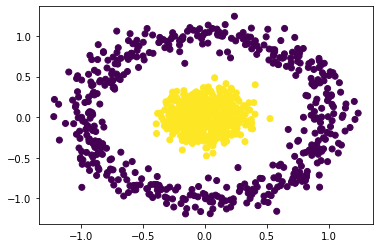

In [10]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)

Non importa che classificatore utilizziamo, se questo è lineare non riuscirà mai a dividere bene le due classi di questo dataset.<br>
Non ci credi ? Proviamo ad eseguire una regressione logistica.
<br>
Realizziamo due funzioni per creare il modello e visualizzare il decision boundary, in modo da poterle riutilizzare.

In [11]:
def make_lr(train_set, test_set):
    X_train, y_train = train_set
    X_test, y_test = test_set
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_prob_train = lr.predict_proba(X_train)

    y_pred = lr.predict(X_test)
    y_prob = lr.predict_proba(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)

    loss_train = log_loss(y_train, y_prob_train)
    loss_test = log_loss(y_test, y_prob)

    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))
    
    return lr

In [12]:
def showBounds(X,y,model):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[y==1]
    X_b = X[y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white')


Adesso utilizziamo le due funzioni per addestrare il modello e visualizzare i risultati.

ACCURACY: TRAIN=0.5300 TEST=0.5000
LOG LOSS: TRAIN=0.6927 TEST=0.6953


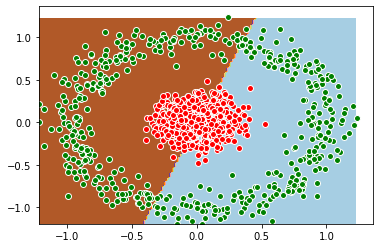

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

lr = make_lr((X_train, y_train), (X_test, y_test))
showBounds(X, y, lr)

Ottimo ! Abbiamo creato un modello pefettamente **inutile**, il decision boundary divide i dati in due parti uguali, pertanto la predizione ha 50-50 di possibilità, come un lancio di moneta.

## Applicare la Kernel PCA

Osserviamo adesso come la situazione cambia drasticamente quando utilizziamo la Kernel PCA.
<br>
Quando il dataset assume questa forma circolare il kernel da utilizzare è quello **gaussiano (o radial basis function - RBF)**, in generale il kernel gaussiano è quello da utilizzare sempre quando non sappiamo come muoverci.
<br>
Applichiamo la Kernel PCA utilizzando la classe KernelPCA di sklearn.

Text(0, 0.5, 'Kernel Principal Component 2')

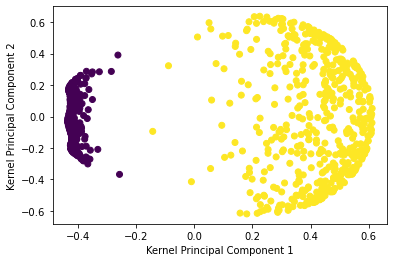

In [14]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", gamma=5)
kpc = kpca.fit_transform(X)

plt.scatter(kpc[:,0],kpc[:,1], c=y)
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")

La Kernel PCA ha estratto due componenti principali, la prima contiene le informazioni necessarie per eseguire la classificazione con un semplice classificatore lineare.<br>
Proviamo a visualizzare solo la prima componente.

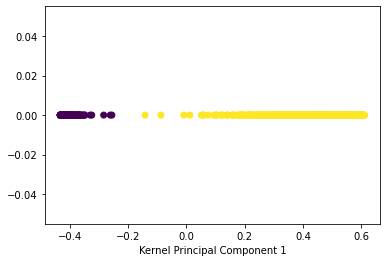

In [15]:
plt.xlabel("Kernel Principal Component 1")
plt.scatter(kpc[:,0],np.zeros((1000,1)), c=y)

Adesso il problema di classificazione è estremamente banale, proviamo con un semplice regressore lineare.

In [16]:
kpc_train, kpc_test, y_train, y_test = train_test_split(kpc, y, test_size=0.2, random_state=0)  

lr = LogisticRegression()
lr.fit(kpc_train, y_train)

y_pred_train = lr.predict(kpc_train)
y_prob_train = lr.predict_proba(kpc_train)

y_pred = lr.predict(kpc_test)
y_prob = lr.predict_proba(kpc_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

loss_train = log_loss(y_train, y_prob_train)
loss_test = log_loss(y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

ACCURACY: TRAIN=1.0000 TEST=1.0000
LOG LOSS: TRAIN=0.0337 TEST=0.0322
